In [1]:
#Importing necessary libraries:
import matplotlib.pyplot as plt

In [2]:
#Function for common raster with 4 co-ordinates:
def printRaster():
    plt.grid()
    plt.xlabel("X-axis")
    plt.ylabel("Y-axis")
    plt.plot([0.0,0.0], [-1.0*(rasterSize/2),(rasterSize/2)], color="black", linestyle="dotted")
    plt.plot([-1.0*(rasterSize/2),(rasterSize/2)], [0.0,0.0], color="black", linestyle="dotted")

In [3]:
rasterSize = 10 #eval(input("Enter Raster Size: "))

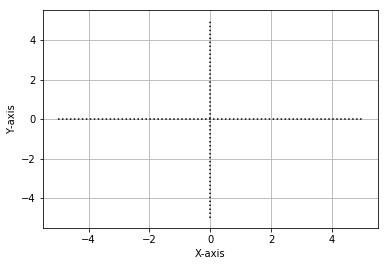

In [4]:
printRaster() #Calling function 'printRaster()'
plt.show() #Displaying raster with 4 co-ordinates

In [5]:
#Input viewport co-ordinates:
view_co = input("Viewport co-ordinates (lower-left - upper-right): ")

Viewport co-ordinates (lower-left - upper-right): -2 -2 2 2


In [6]:
view_co

'-2 -2 2 2'

In [7]:
view_points = view_co.split(" ")
view_points

['-2', '-2', '2', '2']

In [8]:
if eval(view_points[0]) < eval(view_points[2]):
    x_min = eval(view_points[0])
    x_max = eval(view_points[2])
else:
    x_min = eval(view_points[2])
    x_max = eval(view_points[0])
print("x_min=",x_min,", x_max=",x_max)

x_min= -2 , x_max= 2


In [9]:
if eval(view_points[1]) < eval(view_points[3]):
    y_min = eval(view_points[1])
    y_max = eval(view_points[3])
else:
    y_min = eval(view_points[3])
    y_max = eval(view_points[1])
print("y_min=",y_min,", y_max=",y_max)

y_min= -2 , y_max= 2


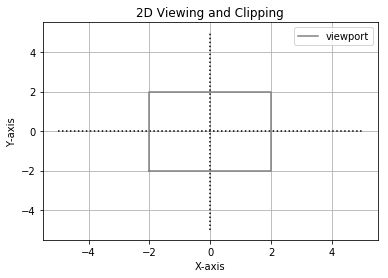

In [10]:
printRaster() #Calling function to display the raster
plt.title("2D Viewing and Clipping") #Title of the figure

#Plotting and joining each corner points...
plt.plot([x_min,x_max,x_max,x_min,x_min], [y_min,y_min,y_max,y_max,y_min], label="viewport", color='grey') #and the scaled object.

plt.legend()
plt.show()

In [11]:
polygonCoordinates = input("Polygon co-ordinates (counter-clockwise): ")

Polygon co-ordinates (counter-clockwise): -3 -1 -1 -1 -1 -3 1 -3 1 -1 3 -1 3 1 1 1 1 3 -1 3 -1 1 -3 1


In [12]:
polygonCoordinates

'-3 -1 -1 -1 -1 -3 1 -3 1 -1 3 -1 3 1 1 1 1 3 -1 3 -1 1 -3 1'

In [13]:
polygonPoints = polygonCoordinates.split(" ")
print(polygonPoints)

['-3', '-1', '-1', '-1', '-1', '-3', '1', '-3', '1', '-1', '3', '-1', '3', '1', '1', '1', '1', '3', '-1', '3', '-1', '1', '-3', '1']


In [14]:
x_list = [] #List for x-axis values of object points
y_list = [] #List for y-axis values of object points

#Convert the elements into float and split them into x & y co-ordinate values:
for i in range (0, len(polygonPoints)):
    temp = eval(polygonPoints[i])
    
    if i%2 == 0: #If the position of current found string is even, then it is the value of x co-ordinate...
        x_list.append(temp)
    else: #otherwise, it is the value of y co-ordinate...
        y_list.append(temp)
        
x_list.append(eval(polygonPoints[0]))
y_list.append(eval(polygonPoints[1]))

In [15]:
x_list

[-3, -1, -1, 1, 1, 3, 3, 1, 1, -1, -1, -3, -3]

In [16]:
y_list

[-1, -1, -3, -3, -1, -1, 1, 1, 3, 3, 1, 1, -1]

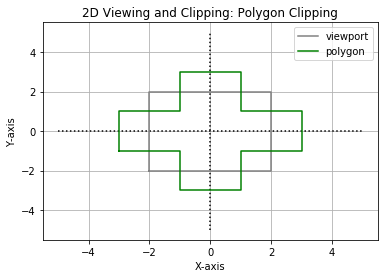

In [17]:
printRaster() #Calling function to display the raster
plt.title("2D Viewing and Clipping: Polygon Clipping") #Title of the figure
plt.plot([x_min,x_max,x_max,x_min,x_min], [y_min,y_min,y_max,y_max,y_min], label="viewport", color="grey") #Viewport
plt.plot(x_list, y_list, label="polygon", color="green") #Polygon

plt.legend()
plt.show()

In [18]:
clipped_xList_1 = []
clipped_yList_1 = []

#Clipping with respect to line x_max:
for i in range(0, len(x_list)):
    Px_prev = x_list[i-1]
    Px_current = x_list[i]

    Py_prev = y_list[i-1]
    Py_current = y_list[i]
    
    if Px_prev<=x_max and Px_current<=x_max: #Pi-1 and Pi - both are to the left of the clipping line.
        clipped_xList_1.append(Px_current)
        clipped_yList_1.append(Py_current)
    
    elif Px_prev>x_max and Px_current>x_max: #Pi-1 and Pi - both are to the right side of the clipping line.
        continue
    
    elif Px_prev<=x_max and Px_current>x_max: #Pi-1 to the left, but Pi to the right side of the clipping line.
        Ix = x_max
        Iy = Py_prev+(Ix-Px_prev)*((Py_current-Py_prev)/(Px_current-Px_prev))
        
        clipped_xList_1.append(Ix)
        clipped_yList_1.append(Iy)
    
    elif Px_prev>x_max and Px_current<=x_max: #Pi-1 to right, but Pi to the left of the clipping line.        
        Ix = x_max
        Iy = Py_prev+(Ix-Px_prev)*((Py_current-Py_prev)/(Px_current-Px_prev))
        
        clipped_xList_1.append(Ix)
        clipped_yList_1.append(Iy)
        
        clipped_xList_1.append(Px_current)
        clipped_yList_1.append(Py_current)
        
clipped_xList_1.append(clipped_xList_1[0])
clipped_yList_1.append(clipped_yList_1[0])

In [19]:
clipped_xList_1

[-3, -1, -1, 1, 1, 2, 2, 1, 1, -1, -1, -3, -3, -3]

In [20]:
clipped_yList_1

[-1, -1, -3, -3, -1, -1.0, 1.0, 1, 3, 3, 1, 1, -1, -1]

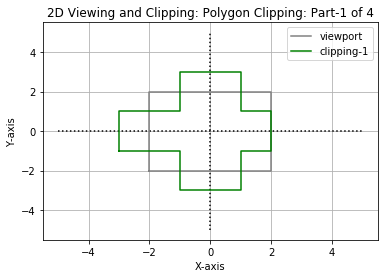

In [21]:
printRaster() #Calling function to display the raster
plt.title("2D Viewing and Clipping: Polygon Clipping: Part-1 of 4") #Title of the figure

plt.plot([x_min,x_max,x_max,x_min,x_min], [y_min,y_min,y_max,y_max,y_min], label="viewport", color="grey") #Viewport
plt.plot(clipped_xList_1, clipped_yList_1, label="clipping-1", color="green") #Polygon after 1st clipping.

plt.legend()
plt.show()

In [22]:
clipped_xList_2 = []
clipped_yList_2 = []

#Clipping with respect to line y_max:
for i in range(0, len(clipped_xList_1)):
    Px_prev = clipped_xList_1[i-1]
    Px_current = clipped_xList_1[i]

    Py_prev = clipped_yList_1[i-1]
    Py_current = clipped_yList_1[i]
    
    if Py_prev<=y_max and Py_current<=y_max: #Pi-1 and Pi - both are to the left of the clipping line.
        clipped_xList_2.append(Px_current)
        clipped_yList_2.append(Py_current)
    
    elif Py_prev>y_max and Py_current>y_max: #Pi-1 and Pi - both are to the right side of the clipping line.
        continue
    
    elif Py_prev<=y_max and Py_current>y_max: #Pi-1 to the left, but Pi to the right side of the clipping line.
        Iy = y_max
        Ix = Px_prev+(Iy-Py_prev)*((Px_current-Px_prev)/(Py_current-Py_prev))
        
        clipped_xList_2.append(Ix)
        clipped_yList_2.append(Iy)
    
    elif Py_prev>y_max and Py_current<=y_max: #Pi-1 to right, but Pi to the left of the clipping line.
        Iy = y_max
        Ix = Px_prev+(Iy-Py_prev)*((Px_current-Px_prev)/(Py_current-Py_prev))
        
        clipped_xList_2.append(Ix)
        clipped_yList_2.append(Iy)
        
        clipped_xList_2.append(Px_current)
        clipped_yList_2.append(Py_current)
        
clipped_xList_2.append(clipped_xList_2[0])
clipped_yList_2.append(clipped_yList_2[0])

In [23]:
clipped_xList_2

[-3, -1, -1, 1, 1, 2, 2, 1, 1.0, -1.0, -1, -3, -3, -3, -3]

In [24]:
clipped_yList_2

[-1, -1, -3, -3, -1, -1.0, 1.0, 1, 2, 2, 1, 1, -1, -1, -1]

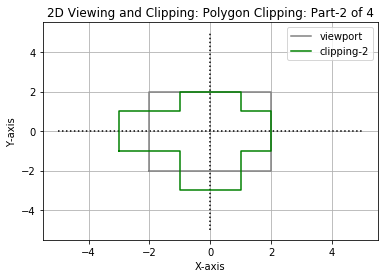

In [25]:
printRaster() #Calling function to display the raster
plt.title("2D Viewing and Clipping: Polygon Clipping: Part-2 of 4") #Title of the figure

plt.plot([x_min,x_max,x_max,x_min,x_min], [y_min,y_min,y_max,y_max,y_min], label="viewport", color="grey") #Viewport
plt.plot(clipped_xList_2, clipped_yList_2, label="clipping-2", color="green") #Polygon after 2nd clipping.

plt.legend()
plt.show()

In [26]:
clipped_xList_3 = []
clipped_yList_3 = []

#Clipping with respect to line x_min:
for i in range(0, len(clipped_xList_2)):
    Px_prev = clipped_xList_2[i-1]
    Px_current = clipped_xList_2[i]

    Py_prev = clipped_yList_2[i-1]
    Py_current = clipped_yList_2[i]
    
    if Px_prev>=x_min and Px_current>=x_min: #Pi-1 and Pi - both are to the left of the clipping line.
        clipped_xList_3.append(Px_current)
        clipped_yList_3.append(Py_current)
    
    elif Px_prev<x_min and Px_current<x_min: #Pi-1 and Pi - both are to the right side of the clipping line.
        continue
    
    elif Px_prev>=x_min and Px_current<x_min: #Pi-1 to the left, but Pi to the right side of the clipping line.
        Ix = x_min
        Iy = Py_prev+(Ix-Px_prev)*((Py_current-Py_prev)/(Px_current-Px_prev))
        
        clipped_xList_3.append(Ix)
        clipped_yList_3.append(Iy)
    
    elif Px_prev<x_min and Px_current>=x_min: #Pi-1 to right, but Pi to the left of the clipping line.
        Ix = x_min
        Iy = Py_prev+(Ix-Px_prev)*((Py_current-Py_prev)/(Px_current-Px_prev))
        
        clipped_xList_3.append(Ix)
        clipped_yList_3.append(Iy)
        
        clipped_xList_3.append(Px_current)
        clipped_yList_3.append(Py_current)
        
clipped_xList_3.append(clipped_xList_3[0])
clipped_yList_3.append(clipped_yList_3[0])

In [27]:
clipped_xList_3

[-2, -1, -1, 1, 1, 2, 2, 1, 1.0, -1.0, -1, -2, -2]

In [28]:
clipped_yList_3

[-1.0, -1, -3, -3, -1, -1.0, 1.0, 1, 2, 2, 1, 1.0, -1.0]

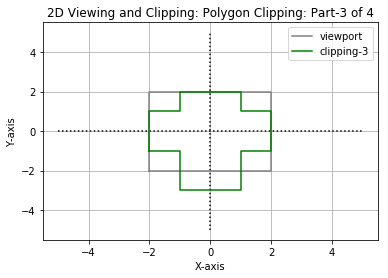

In [29]:
printRaster() #Calling function to display the raster
plt.title("2D Viewing and Clipping: Polygon Clipping: Part-3 of 4") #Title of the figure

plt.plot([x_min,x_max,x_max,x_min,x_min], [y_min,y_min,y_max,y_max,y_min], label="viewport", color="grey") #Viewport
plt.plot(clipped_xList_3, clipped_yList_3, label="clipping-3", color="green") #Polygon after 3rd clipping.

plt.legend()
plt.show()

In [30]:
clipped_xList_4 = []
clipped_yList_4 = []

#Clipping with respect to line y_min:
for i in range(0, len(clipped_xList_3)):
    Px_prev = clipped_xList_3[i-1]
    Px_current = clipped_xList_3[i]

    Py_prev = clipped_yList_3[i-1]
    Py_current = clipped_yList_3[i]
    
    if Py_prev>=y_min and Py_current>=y_min: #Pi-1 and Pi - both are to the left of the clipping line.
        clipped_xList_4.append(Px_current)
        clipped_yList_4.append(Py_current)
    
    elif Py_prev<y_min and Py_current<y_min: #Pi-1 and Pi - both are to the right side of the clipping line.
        continue
    
    elif Py_prev>=y_min and Py_current<y_min: #Pi-1 to the left, but Pi to the right side of the clipping line.
        Iy = y_min
        Ix = Px_prev+(Iy-Py_prev)*((Px_current-Px_prev)/(Py_current-Py_prev))
        
        clipped_xList_4.append(Ix)
        clipped_yList_4.append(Iy)
    
    elif Py_prev<y_min and Py_current>=y_min: #Pi-1 to right, but Pi to the left of the clipping line.
        Iy = y_min
        Ix = Px_prev+(Iy-Py_prev)*((Px_current-Px_prev)/(Py_current-Py_prev))
        
        clipped_xList_4.append(Ix)
        clipped_yList_4.append(Iy)
        
        clipped_xList_4.append(Px_current)
        clipped_yList_4.append(Py_current)
        
clipped_xList_4.append(clipped_xList_4[0])
clipped_yList_4.append(clipped_yList_4[0])

In [31]:
clipped_xList_4

[-2, -1, -1.0, 1.0, 1, 2, 2, 1, 1.0, -1.0, -1, -2, -2, -2]

In [32]:
clipped_yList_4

[-1.0, -1, -2, -2, -1, -1.0, 1.0, 1, 2, 2, 1, 1.0, -1.0, -1.0]

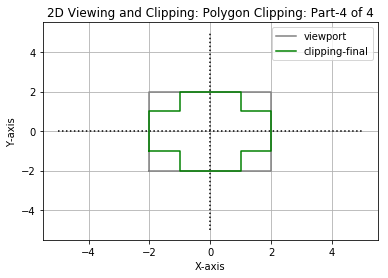

In [33]:
printRaster() #Calling function to display the raster
plt.title("2D Viewing and Clipping: Polygon Clipping: Part-4 of 4") #Title of the figure

plt.plot([x_min,x_max,x_max,x_min,x_min], [y_min,y_min,y_max,y_max,y_min], label="viewport", color="grey") #Viewport
plt.plot(clipped_xList_4, clipped_yList_4, label="clipping-final", color="green") #Polygon after 4th clipping.

plt.legend()
plt.show()